### ORBIT Example - Cash Flow and NPV

Last Updated: 07/28/2021

In [17]:
# This notebook provides an example of the cash flow and net present value functionality in ORBIT.

import os
import pandas as pd
import matplotlib.pyplot as plt
from ORBIT import ProjectManager, load_config

weather = pd.read_csv("data/example_weather.csv", parse_dates=["datetime"])\
            .set_index("datetime")

#### Load the Project Configuration

In [11]:
config = load_config("configs/example_fixed_project.yaml")

# config['install_phases'] = {
#     'ArrayCableInstallation': 0,
#     'ExportCableInstallation': 2000,
#     'MonopileInstallation': ('ScourProtectionInstallation', 0.5),
#     'OffshoreSubstationInstallation': 0,
#     'ScourProtectionInstallation': 0,
#     'TurbineInstallation': ('MonopileInstallation', 0.1)
# }

For this example, a project with the following phases will be configured:

- ProjectDevelopment
- MonopileDesign
- ArraySystemDesign
- ExportSystemDesign
- OffshoreSubstationDesign
- ArrayCableInstallation
- ExportCableInstallation
- MonopileInstallation
- OffshoreSubstationInstallation
- TurbineInstallation

The configuration below represents a "complete" project that will be able to produce
power when the requisite pieces are done being installed. As each array string is able to
generate power, the project will begin to generate additional revenue and incur
O&M costs.

In [4]:
project = ProjectManager(config, weather=weather)
project.run()

ORBIT library intialized at '/Users/jnunemak/Fun/repos/ORBIT/library'


### NPV

In [9]:
# In addition to the other results shown in previous examples, the NPV of the project is available:

print(f"Net Present Value: {project.npv/1e6:.2f} M")

Net Present Value: 426.31 M


#### Project Progress + String Energization Points

The "progress points" of the project are tracked in the output below. These are used to determine when array strings and turbines can be energized and revenue begins.

In [12]:
project.progress.data[:25]

[('Offshore Substation', 120.0925357142857),
 ('Array String', 313.9859420289855),
 ('Array String', 618.4459420289855),
 ('Array String', 843.9059420289856),
 ('Array String', 1253.1092753623188),
 ('Substructure', 1496.5764009525235),
 ('Substructure', 1516.3403019050465),
 ('Substructure', 1534.1042028575694),
 ('Substructure', 1551.8681038100924),
 ('Substructure', 1569.6320047626155),
 ('Substructure', 1627.3959057151385),
 ('Substructure', 1675.1598066676615),
 ('Array String', 1688.5692753623189),
 ('Turbine', 1791.015338095949),
 ('Turbine', 1842.1986714292825),
 ('Substructure', 1888.7237076201845),
 ('Turbine', 1893.382004762616),
 ('Substructure', 1906.4876085727078),
 ('Array String', 1918.029275362319),
 ('Substructure', 1924.2515095252309),
 ('Substructure', 1942.015410477754),
 ('Turbine', 1944.5653380959493),
 ('Substructure', 1959.7793114302772),
 ('Substructure', 1977.5432123828004),
 ('Turbine', 1997.7486714292827)]

In [13]:
project.progress.energize_points

([2626.8153260869567,
  2626.8153260869567,
  3208.7320047626126,
  3866.13200476261,
  4333.532004762608,
  4829.932004762606,
  5156.032004762603,
  5620.432004762601,
  5764.09867142927],
 [6, 6, 6, 6, 6, 6, 6, 6, 2])

__Format__: [string installation times], [number of turbines energized]

#### Monthly Cash Flow

The monthly cash flow is shown below.

- Revenue is generated as each turbine and associated array string is powered and the export system has been installed.
- A simple generation model is implemented for now (constant NCF), however this is an area for future development.
- The expenses from each installation phase are collected and totaled per month.
- As turbines are powered, the project begins accruing additional operating expenses.

In [15]:
df = pd.DataFrame(list(zip(
    project.monthly_expenses.values(),
    project.monthly_revenue.values(),
    project.cash_flow.values()
)), columns=["Expenses", "Revenue", "Cash Flow"])

df.head(25)

,Expenses,Revenue,Cash Flow
0,1.159244e+07,0.0,-1.159244e+07
1,9.592865e+06,0.0,-9.592865e+06
2,7.878374e+07,0.0,-7.878374e+07
3,1.748031e+07,1681920.0,-1.579839e+07
4,1.231171e+07,2522880.0,-9.788830e+06
5,1.000148e+07,4204800.0,-5.796680e+06
6,8.155250e+06,5045760.0,-3.109490e+06
7,8.677000e+06,7008000.0,-1.669000e+06
8,3.750000e+06,7008000.0,3.258000e+06
9,3.750000e+06,7008000.0,3.258000e+06


### Cash Flow Figure

Play around with the start dates of the configuration above. As the dates are moved around, the underlying expenses and generation will shift, affecting the net present value of the project.

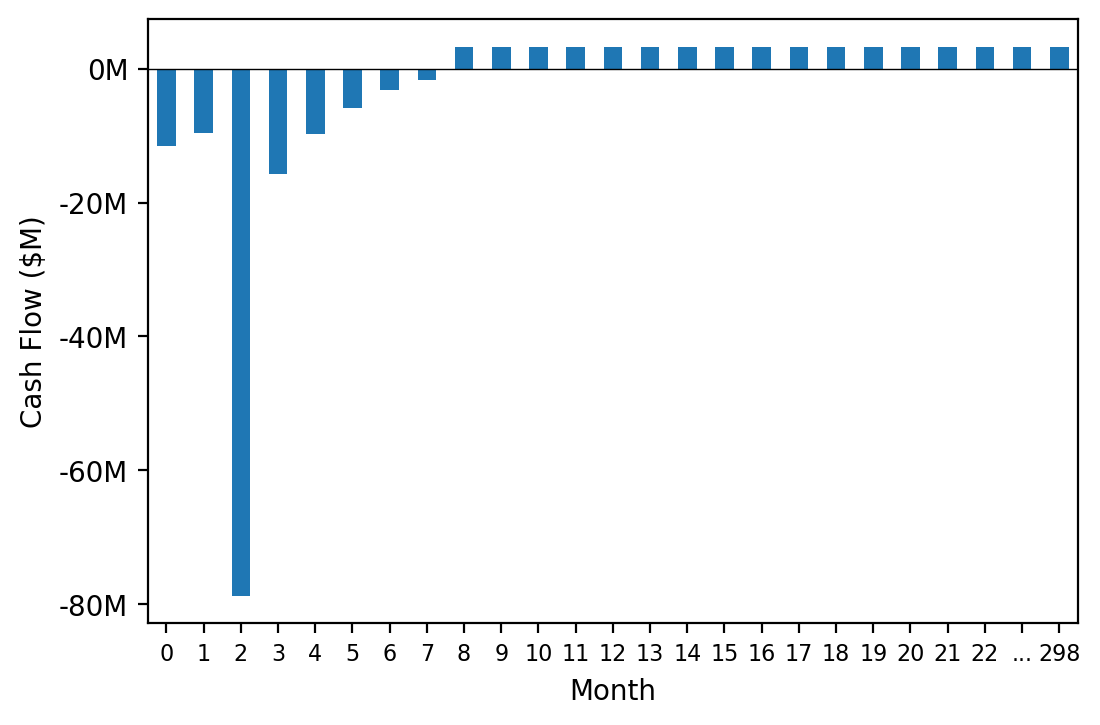

In [18]:
fig = plt.figure(figsize=(6, 4), dpi=200)
axis = fig.add_subplot(111)

last = 24

df.loc[:last, "Cash Flow"].plot(kind='bar', ax=axis)

## Formatting
_ = axis.axhline(0, color='k', lw=0.5)

# Axis Labels
axis.set_xlabel("Month")

xticks = []
for i, tick in enumerate(axis.get_xticklabels()):
    tick.set_rotation(0)
    tick.set_fontsize(8)
    xticks.append(tick)
    
# xticks = [str(item.get_text()) for item in axis.get_xticklabels()]
xticks[-2] = "..."
xticks[-1] = str(df.index.max())

_ = axis.set_xticklabels(xticks)

axis.set_ylabel("Cash Flow ($M)")
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}M".format(int(x) / 1e6)))